In [38]:
from __future__ import division
from numpy import array, linspace, random
from scipy.stats import bernoulli, norm
from matplotlib import cm
from matplotlib.pylab import figure, subplots

ma_true = 4
mb_true = 7
fa = norm(ma_true, 1)
fb = norm(mb_true, 1)
fz = bernoulli(0.25)

def sample(n=10):
    tmp = fz.rvs(n)  # generate n random numbers
    return tmp*(fb.rvs(n)) + (1-tmp)*fa.rvs(n)

xs = sample(1000)

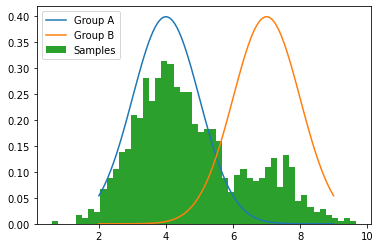

In [39]:
f, ax = subplots()
x = linspace(ma_true-2, mb_true+2, 100)
ax.plot(x, fa.pdf(x), label='Group A')
ax.plot(x, fb.pdf(x), label='Group B')
ax.hist(xs, bins=50, density=True, label='Samples')
ax.legend(loc=0)

In [40]:
#minimize the expectation
import sympy
from sympy.abc import x,z
from sympy import stats

mu_a, mu_b = sympy.symbols('mu_a, mu_b')
na = stats.Normal('x', mu_a, 1)
nb = stats.Normal('x', mu_b, 1)

L = (stats.density(na)(x) + stats.density(nb)(x))/2

In [13]:
def ez(x, mu_a, mu_b):
    return norm(mu_a).pdf(x) / (norm(mu_a).pdf(x) + norm(mu_b).pdf(x))

Text(0.5, 1.0, 'Incomplete likelihood')

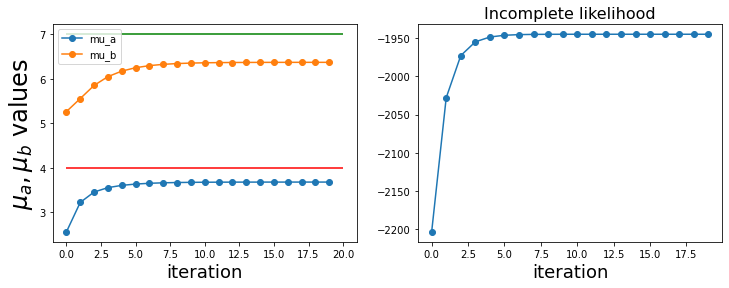

In [17]:
Lf = sympy.lambdify((x, mu_a, mu_b), sympy.log(abs(L)), 'numpy')

def run():
    out, lout = [], []
    mu_a_n = random.random() * 10
    mu_b_n = random.random() * 10
    for i in range(20):
        tau = ez(xs, mu_a_n, mu_b_n)
        lout.append(sum(Lf(xs, mu_a_n, mu_b_n)))
        out.append((mu_a_n, mu_b_n))
        mu_a_n = (sum(tau*xs)/sum(tau))
        mu_b_n = (sum((1-tau)*xs/sum(1-tau)))
    return out, lout

out, lout = run()

fig=figure()
fig.set_figwidth(12)
ax = fig.add_subplot(121)
ax.plot(array(out), 'o-')
ax.legend(('mu_a', 'mu_b'), loc=0)
ax.hlines([ma_true, mb_true], 0, len(out), ['r', 'g'])
ax.set_xlabel('iteration', fontsize=18)
ax.set_ylabel('$\mu_a, \mu_b$ values', fontsize=24)
ax = fig.add_subplot(122)
ax.plot(array(lout), 'o-')
ax.set_xlabel('iteration', fontsize=18)
ax.set_title('Incomplete likelihood', fontsize=16)